<a href="https://colab.research.google.com/github/pau468/Estadistica/blob/main/Taller_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATOS ORIGINALES:
      Grupo  Tiempo_ms
0   Grupo 1        250
1   Grupo 1        260
2   Grupo 1        245
3   Grupo 1        255
4   Grupo 1        248
5   Grupo 1        252
6   Grupo 1        258
7   Grupo 1        261
8   Grupo 1        249
9   Grupo 1        257
10  Grupo 2        265
11  Grupo 2        270
12  Grupo 2        260
13  Grupo 2        275
14  Grupo 2        268
15  Grupo 2        267
16  Grupo 2        272
17  Grupo 2        269
18  Grupo 2        271
19  Grupo 2        266
20  Grupo 3        240
21  Grupo 3        235
22  Grupo 3        242
23  Grupo 3        238
24  Grupo 3        236
25  Grupo 3        239
26  Grupo 3        241
27  Grupo 3        237
28  Grupo 3        243
29  Grupo 3        240

Medias por Grupo:
  Grupo 1: 253.5000
  Grupo 2: 268.3000
  Grupo 3: 239.1000
Media Global: 253.6333

TABLA ANOVA DE UNA VÍA
Fuente de Variación            SC     gl           CM            F      Valor-p
---------------------------------------------------------------

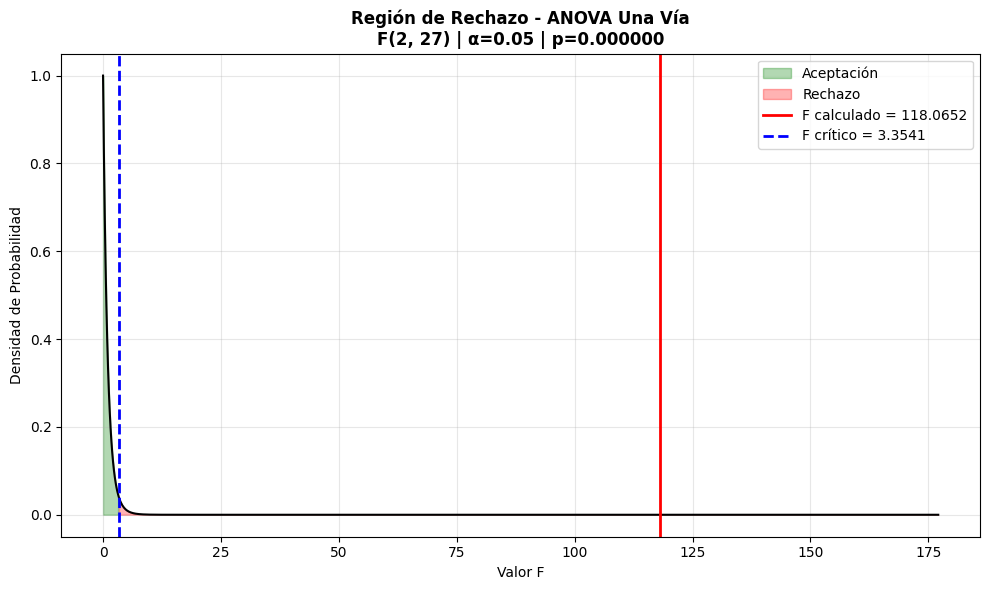

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL PROBLEMA 1 - Tiempos de reacción
# ============================================================================

data = {
    'Grupo': ['Grupo 1'] * 10 + ['Grupo 2'] * 10 + ['Grupo 3'] * 10,
    'Tiempo_ms': [
        # Grupo 1
        250, 260, 245, 255, 248, 252, 258, 261, 249, 257,
        # Grupo 2
        265, 270, 260, 275, 268, 267, 272, 269, 271, 266,
        # Grupo 3
        240, 235, 242, 238, 236, 239, 241, 237, 243, 240
    ]
}

df = pd.DataFrame(data)
grupos = df['Grupo'].unique()

# ============================================================================
# CÁLCULOS PRELIMINARES
# ============================================================================

datos = [df[df['Grupo'] == g]['Tiempo_ms'].values for g in grupos]
n_grupos = len(grupos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Tiempo_ms'].mean()
medias_grupo = df.groupby('Grupo')['Tiempo_ms'].mean().values

print("DATOS ORIGINALES:")
print(df)
print("\nMedias por Grupo:")
for i, g in enumerate(grupos):
    print(f"  {g}: {medias_grupo[i]:.4f}")
print(f"Media Global: {media_global:.4f}\n")

# ============================================================================
# ANOVA DE UNA VÍA
# ============================================================================

SCT = np.sum((df['Tiempo_ms'] - media_global)**2)
SCB = sum([n_obs[i]*(medias_grupo[i] - media_global)**2 for i in range(n_grupos)])
SCE = SCT - SCB

gl_b = n_grupos - 1
gl_e = n_total - n_grupos
gl_t = n_total - 1

CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, gl_b, gl_e)

# ============================================================================
# TABLA ANOVA
# ============================================================================

print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Grupos':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_t:>6}")
print("="*80)

# ============================================================================
# INTERPRETACIÓN
# ============================================================================

print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")

if p_value < alpha:
    print("  ✓ Hay diferencias significativas entre los grupos.\n")
else:
    print("  ✗ No hay diferencias significativas entre los grupos.\n")

# ============================================================================
# GRÁFICO DE REGIÓN DE RECHAZO
# ============================================================================

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', linewidth=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', linewidth=2, label=f'F calculado = {F:.4f}')
plt.axvline(F_crit, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.4f}')
plt.title(f'Región de Rechazo - ANOVA Una Vía\nF({gl_b}, {gl_e}) | α={alpha} | p={p_value:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


TABLA ANOVA DE UNA VÍA
Fuente de Variación            SC     gl           CM            F      Valor-p
--------------------------------------------------------------------------------
Entre Métodos           1605.1667      2     802.5833     260.7244     0.000000
Error                    101.5833     33       3.0783

INTERPRETACIÓN (α = 0.01):
  F calculado = 260.7244
  F crítico = 5.3120
  Valor-p = 0.000000
  ✓ Hay diferencias significativas entre los métodos.



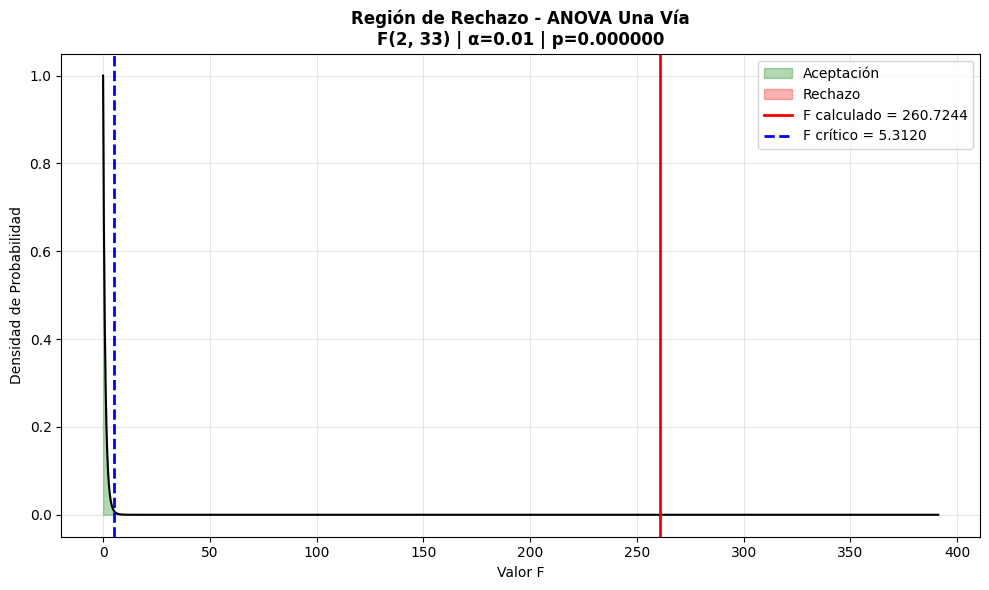

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL PROBLEMA 2 - Métodos de enseñanza
# ============================================================================

data = {
    'Método': ['A'] * 12 + ['B'] * 12 + ['C'] * 12,
    'Calificación': [
        78, 80, 76, 82, 79, 81, 77, 80, 83, 79, 78, 80,
        85, 88, 84, 87, 86, 89, 90, 85, 87, 88, 86, 87,
        70, 72, 68, 71, 69, 73, 70, 72, 71, 70, 69, 71
    ]
}

df = pd.DataFrame(data)
metodos = df['Método'].unique()

# ============================================================================
# ANOVA DE UNA VÍA
# ============================================================================

datos = [df[df['Método'] == m]['Calificación'].values for m in metodos]
n_metodos = len(metodos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Calificación'].mean()
medias = df.groupby('Método')['Calificación'].mean().values

SCT = np.sum((df['Calificación'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_metodos)])
SCE = SCT - SCB

gl_b = n_metodos - 1
gl_e = n_total - n_metodos
CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
alpha = 0.01
F_crit = stats.f.ppf(1 - alpha, gl_b, gl_e)

# ============================================================================
# RESULTADOS Y GRÁFICO
# ============================================================================

print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Métodos':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print("="*80)

print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")

if p_value < alpha:
    print("  ✓ Hay diferencias significativas entre los métodos.\n")
else:
    print("  ✗ No hay diferencias significativas entre los métodos.\n")

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', linewidth=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', linewidth=2, label=f'F calculado = {F:.4f}')
plt.axvline(F_crit, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.4f}')
plt.title(f'Región de Rechazo - ANOVA Una Vía\nF({gl_b}, {gl_e}) | α={alpha} | p={p_value:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


TABLA ANOVA DE UNA VÍA
Fuente de Variación            SC     gl           CM            F      Valor-p
--------------------------------------------------------------------------------
Entre Fertilizantes      142.3438      3      47.4479      53.4087     0.000000
Error                     24.8750     28       0.8884

INTERPRETACIÓN (α = 0.05):
  F calculado = 53.4087
  F crítico = 2.9467
  Valor-p = 0.000000
  ✓ Hay diferencias significativas entre los fertilizantes.



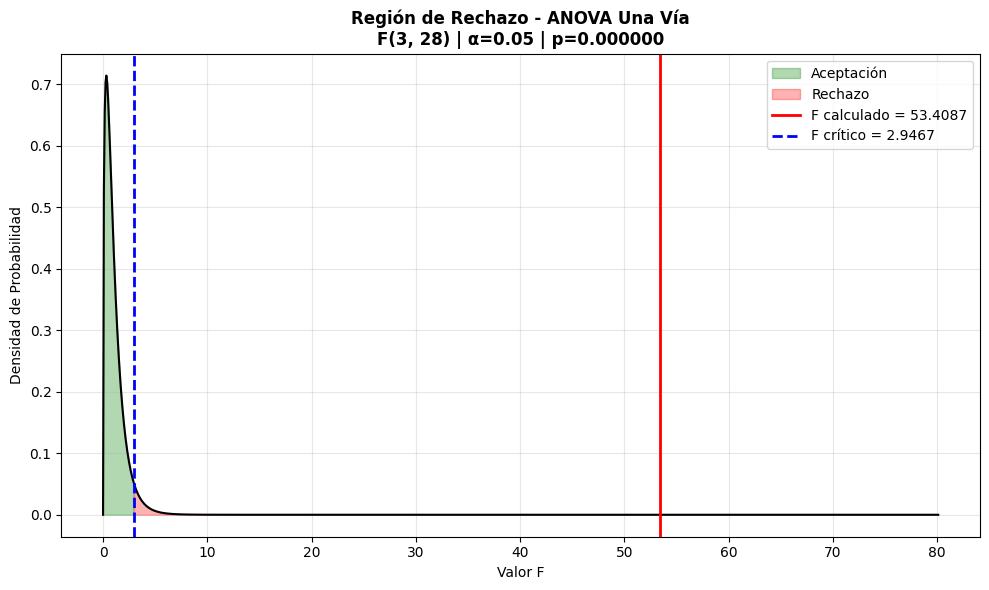

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL PROBLEMA 3 - Fertilizantes
# ============================================================================

data = {
    'Fertilizante': ['F1'] * 8 + ['F2'] * 8 + ['F3'] * 8 + ['F4'] * 8,
    'Altura_cm': [
        15, 16, 14, 17, 15, 16, 14, 15,
        18, 17, 19, 18, 17, 20, 19, 18,
        16, 15, 16, 15, 16, 15, 16, 15,
        20, 21, 19, 20, 21, 22, 21, 19
    ]
}

df = pd.DataFrame(data)
fertilizantes = df['Fertilizante'].unique()

# ============================================================================
# ANOVA DE UNA VÍA
# ============================================================================

datos = [df[df['Fertilizante'] == f]['Altura_cm'].values for f in fertilizantes]
n_fert = len(fertilizantes)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Altura_cm'].mean()
medias = df.groupby('Fertilizante')['Altura_cm'].mean().values

SCT = np.sum((df['Altura_cm'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_fert)])
SCE = SCT - SCB

gl_b = n_fert - 1
gl_e = n_total - n_fert
CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, gl_b, gl_e)

# ============================================================================
# RESULTADOS Y GRÁFICO
# ============================================================================

print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Fertilizantes':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print("="*80)

print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")

if p_value < alpha:
    print("  ✓ Hay diferencias significativas entre los fertilizantes.\n")
else:
    print("  ✗ No hay diferencias significativas entre los fertilizantes.\n")

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', linewidth=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', linewidth=2, label=f'F calculado = {F:.4f}')
plt.axvline(F_crit, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.4f}')
plt.title(f'Región de Rechazo - ANOVA Una Vía\nF({gl_b}, {gl_e}) | α={alpha} | p={p_value:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



=== ANOVA DE UNA VÍA: Tiempos de Reacción ===
Fuente                         SC     gl           CM            F      p-valor
--------------------------------------------------------------------------
Entre Grupos            4263.4667      2    2131.7333     118.0652     0.000000
Error                    487.5000     27      18.0556
Total                   4750.9667     29
--------------------------------------------------------------------------

α = 0.05, F calculado = 118.0652, F crítico = 3.3541, p = 0.000000
✓ Hay diferencias significativas entre los grupos.



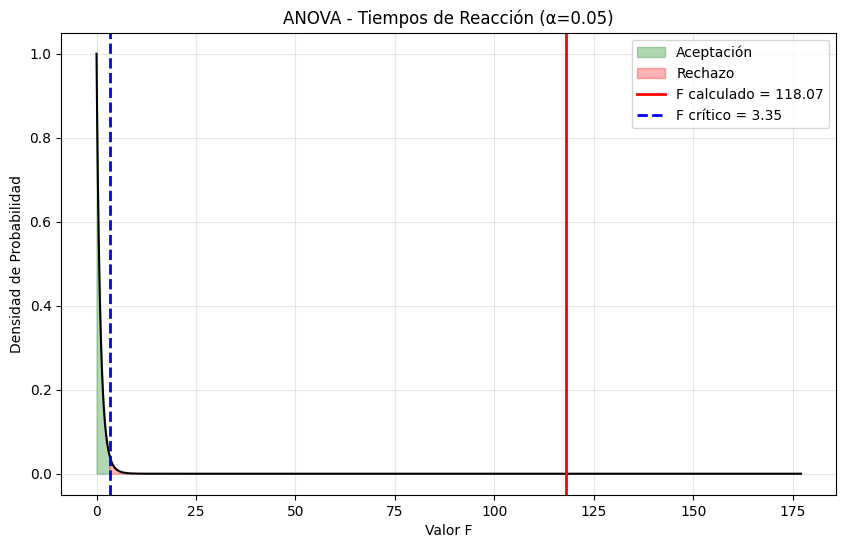

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================
# EJERCICIO 1 - Tiempos de reacción (α = 0.05)
# ============================================================

data = {
    'Grupo': ['Grupo 1']*10 + ['Grupo 2']*10 + ['Grupo 3']*10,
    'Tiempo': [
        # Grupo 1
        250, 260, 245, 255, 248, 252, 258, 261, 249, 257,
        # Grupo 2
        265, 270, 260, 275, 268, 267, 272, 269, 271, 266,
        # Grupo 3
        240, 235, 242, 238, 236, 239, 241, 237, 243, 240
    ]
}

df = pd.DataFrame(data)
grupos = df['Grupo'].unique()
datos = [df[df['Grupo'] == g]['Tiempo'].values for g in grupos]
n_grupos = len(grupos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Tiempo'].mean()
medias = df.groupby('Grupo')['Tiempo'].mean().values

# ============================================================
# ANOVA MANUAL
# ============================================================

SCT = np.sum((df['Tiempo'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_grupos)])
SCE = SCT - SCB

gl_b = n_grupos - 1
gl_e = n_total - n_grupos
gl_t = n_total - 1

CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.95, gl_b, gl_e)

# ============================================================
# TABLA ANOVA
# ============================================================

print("\n=== ANOVA DE UNA VÍA: Tiempos de Reacción ===")
print(f"{'Fuente':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'p-valor':>12}")
print("-"*74)
print(f"{'Entre Grupos':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_t:>6}")
print("-"*74)

# ============================================================
# INTERPRETACIÓN
# ============================================================

alpha = 0.05
print(f"\nα = {alpha}, F calculado = {F:.4f}, F crítico = {F_crit:.4f}, p = {p_value:.6f}")
if p_value < alpha:
    print("✓ Hay diferencias significativas entre los grupos.\n")
else:
    print("✗ No hay diferencias significativas entre los grupos.\n")

# ============================================================
# GRÁFICA DE REGIÓN DE RECHAZO
# ============================================================

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'k-', lw=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', lw=2, label=f'F calculado = {F:.2f}')
plt.axvline(F_crit, color='blue', ls='--', lw=2, label=f'F crítico = {F_crit:.2f}')
plt.title(f'ANOVA - Tiempos de Reacción (α={alpha})')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



=== ANOVA DE UNA VÍA: Métodos de Enseñanza ===
Fuente                         SC     gl           CM            F      p-valor
--------------------------------------------------------------------------
Entre Métodos           1621.0556      2     810.5278     265.2636     0.000000
Error                    100.8333     33       3.0556
Total                   1721.8889     35
--------------------------------------------------------------------------

α = 0.01, F calculado = 265.2636, F crítico = 5.3120, p = 0.000000
✓ Existen diferencias significativas entre los métodos.



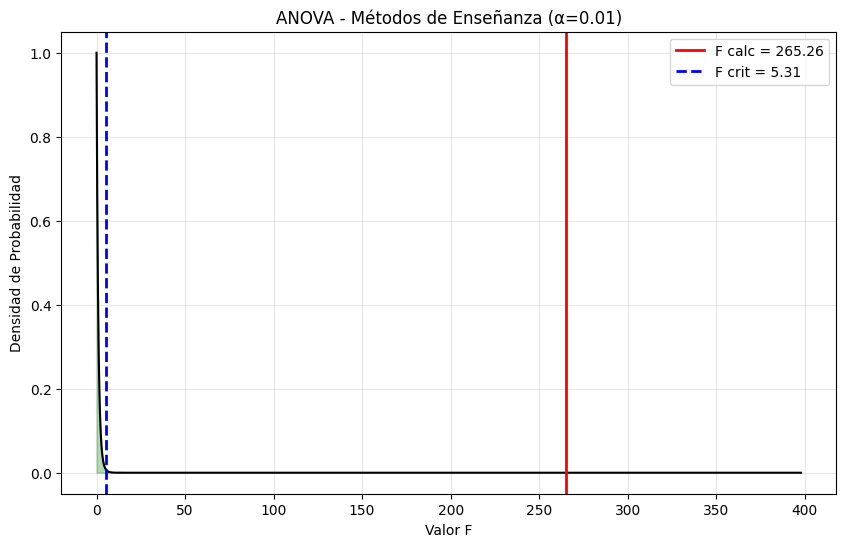

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================
# EJERCICIO 2 - Métodos de enseñanza (α = 0.01)
# ============================================================

data = {
    'Método': ['A']*12 + ['B']*12 + ['C']*12,
    'Nota': [
        # Método A
        78, 80, 76, 82, 79, 81, 77, 80, 83, 79, 78, 80,
        # Método B
        85, 88, 84, 87, 89, 90, 85, 87, 86, 87, 88, 87,
        # Método C
        70, 72, 68, 71, 69, 73, 70, 72, 71, 70, 69, 71
    ]
}

df = pd.DataFrame(data)
metodos = df['Método'].unique()
datos = [df[df['Método'] == m]['Nota'].values for m in metodos]
n_grupos = len(metodos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Nota'].mean()
medias = df.groupby('Método')['Nota'].mean().values

SCT = np.sum((df['Nota'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_grupos)])
SCE = SCT - SCB

gl_b = n_grupos - 1
gl_e = n_total - n_grupos
gl_t = n_total - 1

CMb = SCB / gl_b
CMe = SCE / gl_e
F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(1 - 0.01, gl_b, gl_e)

print("\n=== ANOVA DE UNA VÍA: Métodos de Enseñanza ===")
print(f"{'Fuente':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'p-valor':>12}")
print("-"*74)
print(f"{'Entre Métodos':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_t:>6}")
print("-"*74)

alpha = 0.01
print(f"\nα = {alpha}, F calculado = {F:.4f}, F crítico = {F_crit:.4f}, p = {p_value:.6f}")
if p_value < alpha:
    print("✓ Existen diferencias significativas entre los métodos.\n")
else:
    print("✗ No existen diferencias significativas entre los métodos.\n")

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'k-', lw=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3)
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3)
plt.axvline(F, color='red', lw=2, label=f'F calc = {F:.2f}')
plt.axvline(F_crit, color='blue', ls='--', lw=2, label=f'F crit = {F_crit:.2f}')
plt.title(f'ANOVA - Métodos de Enseñanza (α={alpha})')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



=== ANOVA DE UNA VÍA: Tipos de Fertilizantes ===
Fuente                         SC     gl           CM            F      p-valor
--------------------------------------------------------------------------
Entre Fertilizantes      140.0938      3      46.6979      49.5750     0.000000
Error                     26.3750     28       0.9420
Total                    166.4688     31
--------------------------------------------------------------------------

α = 0.05, F calculado = 49.5750, F crítico = 2.9467, p = 0.000000
✓ Existen diferencias significativas entre los fertilizantes.



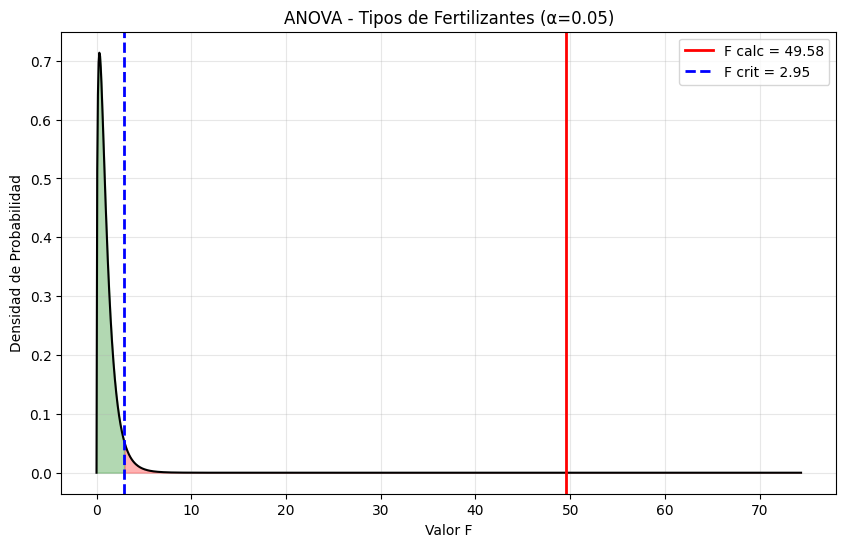

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================
# EJERCICIO 3 - Tipos de fertilizantes (α = 0.05)
# ============================================================

data = {
    'Fertilizante': ['F1']*8 + ['F2']*8 + ['F3']*8 + ['F4']*8,
    'Altura': [
        # Fertilizante 1
        15, 16, 14, 17, 15, 16, 14, 15,
        # Fertilizante 2
        18, 17, 19, 18, 17, 20, 19, 18,
        # Fertilizante 3
        16, 15, 15, 16, 15, 15, 16, 15,
        # Fertilizante 4
        20, 21, 19, 21, 22, 21, 19, 19
    ]
}

df = pd.DataFrame(data)
fertilizantes = df['Fertilizante'].unique()
datos = [df[df['Fertilizante'] == f]['Altura'].values for f in fertilizantes]
n_grupos = len(fertilizantes)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Altura'].mean()
medias = df.groupby('Fertilizante')['Altura'].mean().values

SCT = np.sum((df['Altura'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_grupos)])
SCE = SCT - SCB

gl_b = n_grupos - 1
gl_e = n_total - n_grupos
gl_t = n_total - 1

CMb = SCB / gl_b
CMe = SCE / gl_e
F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.95, gl_b, gl_e)

print("\n=== ANOVA DE UNA VÍA: Tipos de Fertilizantes ===")
print(f"{'Fuente':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'p-valor':>12}")
print("-"*74)
print(f"{'Entre Fertilizantes':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_t:>6}")
print("-"*74)

alpha = 0.05
print(f"\nα = {alpha}, F calculado = {F:.4f}, F crítico = {F_crit:.4f}, p = {p_value:.6f}")
if p_value < alpha:
    print("✓ Existen diferencias significativas entre los fertilizantes.\n")
else:
    print("✗ No existen diferencias significativas entre los fertilizantes.\n")

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'k-', lw=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3)
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3)
plt.axvline(F, color='red', lw=2, label=f'F calc = {F:.2f}')
plt.axvline(F_crit, color='blue', ls='--', lw=2, label=f'F crit = {F_crit:.2f}')
plt.title(f'ANOVA - Tipos de Fertilizantes (α={alpha})')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



=== ANOVA DE DOS VÍAS: Tratamiento × Género ===
                              sum_sq    df           F        PR(>F)
C(Tratamiento)            717.388889   2.0  173.561828  3.232676e-17
C(Género)                   0.111111   1.0    0.053763  8.182138e-01
C(Tratamiento):C(Género)    1.055556   2.0    0.255376  7.762918e-01
Residual                   62.000000  30.0         NaN           NaN

Interpretación (α = 0.05):
✓ El factor 'C(Tratamiento)' tiene un efecto significativo (p = 0.0000)
✗ El factor 'C(Género)' NO es significativo (p = 0.8182)
✗ El factor 'C(Tratamiento):C(Género)' NO es significativo (p = 0.7763)


<Figure size 700x500 with 0 Axes>

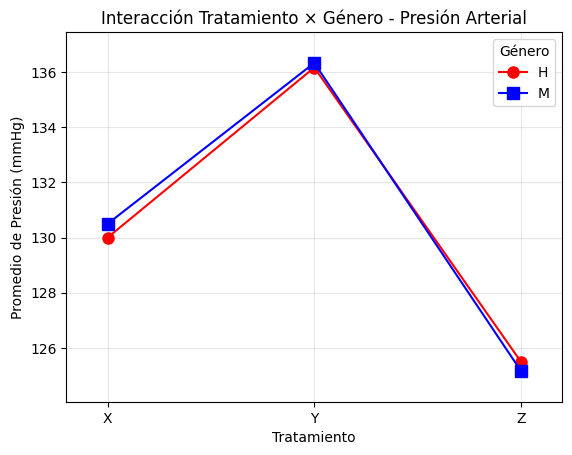

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ============================================================
# EJERCICIO 6 - Efecto del tratamiento y género sobre la presión arterial
# ============================================================

# Datos base
X = [130, 128, 132, 131, 129, 130, 132, 133, 129, 130, 128, 131]
Y = [135, 137, 136, 134, 138, 137, 136, 139, 135, 137, 136, 135]
Z = [125, 127, 124, 126, 125, 126, 124, 125, 127, 125, 126, 124]

# Creamos factor género simulado (H/M)
genero = ["H"] * 6 + ["M"] * 6
tratamientos = ["X"] * 12 + ["Y"] * 12 + ["Z"] * 12

# Unimos todos los datos
data = pd.DataFrame({
    "Tratamiento": tratamientos,
    "Género": genero * 3,
    "Presion": X + Y + Z
})

# ============================================================
# ANOVA DE DOS VÍAS CON INTERACCIÓN
# ============================================================

modelo = ols('Presion ~ C(Tratamiento) * C(Género)', data=data).fit()
anova = sm.stats.anova_lm(modelo, typ=2)
print("\n=== ANOVA DE DOS VÍAS: Tratamiento × Género ===")
print(anova)

# ============================================================
# INTERPRETACIÓN
# ============================================================

alpha = 0.05
print("\nInterpretación (α = 0.05):")
for factor in anova.index:
    if factor != "Residual":
        p = anova.loc[factor, "PR(>F)"]
        if p < alpha:
            print(f"✓ El factor '{factor}' tiene un efecto significativo (p = {p:.4f})")
        else:
            print(f"✗ El factor '{factor}' NO es significativo (p = {p:.4f})")

# ============================================================
# GRÁFICA DE INTERACCIÓN
# ============================================================

plt.figure(figsize=(7,5))
sm.graphics.interaction_plot(data["Tratamiento"], data["Género"], data["Presion"],
                             colors=['red','blue'], markers=['o','s'], ms=8)
plt.title("Interacción Tratamiento × Género - Presión Arterial")
plt.ylabel("Promedio de Presión (mmHg)")
plt.grid(alpha=0.3)
plt.show()


=== TABLA ANOVA DE DOS VÍAS CON INTERACCIÓN ===
                            sum_sq    df           F        PR(>F)
C(Condicion)              3740.475   3.0  498.730000  6.247788e-27
C(Operador)                  0.025   1.0    0.010000  9.209682e-01
C(Condicion):C(Operador)     2.875   3.0    0.383333  7.656954e-01
Residual                    80.000  32.0         NaN           NaN

Interpretación (α = 0.05):
✓ El factor 'C(Condicion)' tiene un efecto significativo (p = 0.0000)
✗ El factor 'C(Operador)' NO es significativo (p = 0.9210)
✗ El factor 'C(Condicion):C(Operador)' NO es significativo (p = 0.7657)

Como el efecto de Condición es significativo (sin interacción significativa), se realiza la prueba de Tukey en Condición.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    C1     C2     10.1   0.0   8.2723  11.9277   True
    C1     C3     -5.2   0.0  -7.0277  -3.3723   

<Figure size 800x600 with 0 Axes>

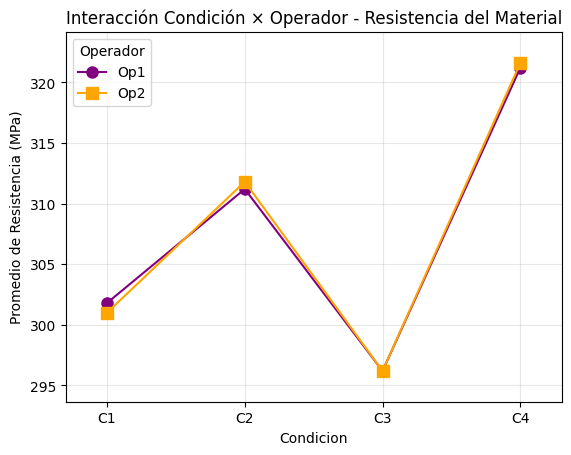

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ============================================================================
# DATOS DEL PROBLEMA 8 - Resistencia del material
# ============================================================================

data = {
    'Condicion': ['C1'] * 10 + ['C2'] * 10 + ['C3'] * 10 + ['C4'] * 10,
    'Operador': (['Op1'] * 5 + ['Op2'] * 5) * 4, # Assuming 2 operators per condition
    'Resistencia': [
        # Condición 1
        300, 305, 298, 302, 304, 300, 303, 301, 299, 302,
        # Condición 2
        310, 312, 311, 313, 310, 312, 311, 314, 312, 310,
        # Condición 3
        295, 297, 296, 295, 298, 297, 296, 295, 297, 296,
        # Condición 4
        320, 322, 321, 323, 320, 322, 321, 323, 322, 320
    ]
}

df = pd.DataFrame(data)

# ============================================================================
# ANOVA DE DOS VÍAS CON INTERACCIÓN
# ============================================================================

# Fit the model with interaction
# Use C() to treat 'Condicion' and 'Operador' as categorical variables
modelo = ols('Resistencia ~ C(Condicion) * C(Operador)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("=== TABLA ANOVA DE DOS VÍAS CON INTERACCIÓN ===")
print(anova_table)

# ============================================================================
# INTERPRETACIÓN ANOVA
# ============================================================================

alpha = 0.05
print("\nInterpretación (α = 0.05):")

# Check for significance of each factor and the interaction
for factor in anova_table.index:
    if factor != "Residual":
        p = anova_table.loc[factor, "PR(>F)"]
        if p < alpha:
            print(f"✓ El factor '{factor}' tiene un efecto significativo (p = {p:.4f})")
        else:
            print(f"✗ El factor '{factor}' NO es significativo (p = {p:.4f})")

# ============================================================================
# PRUEBA POST-HOC DE TUKEY (si hay efectos significativos)
# ============================================================================

# Perform Tukey test if the interaction or any main effect is significant
# A common approach is to run Tukey on the combined factor levels if interaction is significant,
# or on main effects if only they are significant.
# Here, we'll run Tukey on the combined 'Condicion:Operador' levels if the interaction is significant,
# or on 'Condicion' if only Condicion is significant, and 'Operador' if only Operador is significant.
# If both main effects are significant but not interaction, you might run Tukey on both.

if anova_table.loc['C(Condicion):C(Operador)', 'PR(>F)'] < alpha:
    print("\nDebido a la interacción significativa, se realiza la prueba de Tukey en la combinación de Condición y Operador.")
    # Create a combined factor for Tukey test
    df['Combinacion'] = df['Condicion'] + ":" + df['Operador']
    tukey_result = pairwise_tukeyhsd(endog=df['Resistencia'], groups=df['Combinacion'], alpha=alpha)
    print(tukey_result)
elif anova_table.loc['C(Condicion)', 'PR(>F)'] < alpha:
    print("\nComo el efecto de Condición es significativo (sin interacción significativa), se realiza la prueba de Tukey en Condición.")
    tukey_result = pairwise_tukeyhsd(endog=df['Resistencia'], groups=df['Condicion'], alpha=alpha)
    print(tukey_result)
elif anova_table.loc['C(Operador)', 'PR(>F)'] < alpha:
     print("\nComo el efecto de Operador es significativo (sin interacción significativa), se realiza la prueba de Tukey en Operador.")
     tukey_result = pairwise_tukeyhsd(endog=df['Resistencia'], groups=df['Operador'], alpha=alpha)
     print(tukey_result)
else:
    print("\nNo se encontraron efectos significativos en ANOVA, por lo tanto, no se realiza la prueba de Tukey.")

# ============================================================================
# GRÁFICA DE INTERACCIÓN
# ============================================================================

plt.figure(figsize=(8, 6))
sm.graphics.interaction_plot(df["Condicion"], df["Operador"], df["Resistencia"],
                             colors=['purple','orange'], markers=['o','s'], ms=8)
plt.title("Interacción Condición × Operador - Resistencia del Material")
plt.ylabel("Promedio de Resistencia (MPa)")
plt.grid(alpha=0.3)
plt.show()